# Word2vec on hotel review data
The review data file can be downloaded from
https://github.com/kavgan/nlp-in-practice/blob/master/word2vec/reviews_data.txt.gz

In [1]:
import gzip
import gensim
import logging
import os
import pandas as pd

In [2]:
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s',
    level=logging.INFO)

In [3]:
def show_file_contents(input_file):
    with gzip.open(input_file, 'rb') as f:
        for i, line in enumerate(f):
            print(line)
            break

In [4]:
def read_input(input_file):
    """This method reads the input file which is in gzip format"""

    logging.info("reading file {0}...this may take a while".format(input_file))
    with gzip.open(input_file, 'rb') as f:
        for i, line in enumerate(f):

            if (i % 10000 == 0):
                logging.info("read {0} reviews".format(i))
            # do some pre-processing and return list of words for each review
            # text
            yield gensim.utils.simple_preprocess(line)

In [5]:
data_file = "reviews_data.txt.gz"

# read the tokenized reviews into a list
# each review item becomes a serries of words
# so this becomes a list of lists
documents = list(read_input(data_file))

2020-04-12 12:22:09,309 : INFO : reading file reviews_data.txt.gz...this may take a while
2020-04-12 12:22:09,398 : INFO : read 0 reviews
2020-04-12 12:22:11,166 : INFO : read 10000 reviews
2020-04-12 12:22:13,018 : INFO : read 20000 reviews
2020-04-12 12:22:15,182 : INFO : read 30000 reviews
2020-04-12 12:22:17,293 : INFO : read 40000 reviews
2020-04-12 12:22:19,504 : INFO : read 50000 reviews
2020-04-12 12:22:21,797 : INFO : read 60000 reviews
2020-04-12 12:22:23,640 : INFO : read 70000 reviews
2020-04-12 12:22:25,270 : INFO : read 80000 reviews
2020-04-12 12:22:27,040 : INFO : read 90000 reviews
2020-04-12 12:22:28,729 : INFO : read 100000 reviews
2020-04-12 12:22:30,334 : INFO : read 110000 reviews
2020-04-12 12:22:32,000 : INFO : read 120000 reviews
2020-04-12 12:22:34,264 : INFO : read 130000 reviews
2020-04-12 12:22:36,133 : INFO : read 140000 reviews
2020-04-12 12:22:37,922 : INFO : read 150000 reviews
2020-04-12 12:22:39,640 : INFO : read 160000 reviews
2020-04-12 12:22:41,365

## Build and train the word2vec model

In [6]:
# build vocabulary and train model
model = gensim.models.Word2Vec(
    documents,
    size=150,
    window=10,
    min_count=2,
    workers=10)
model.train(documents, total_examples=len(documents), epochs=10)

2020-04-12 12:22:57,668 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2020-04-12 12:22:57,698 : INFO : collecting all words and their counts
2020-04-12 12:22:57,699 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-04-12 12:22:57,957 : INFO : PROGRESS: at sentence #10000, processed 1655714 words, keeping 25777 word types
2020-04-12 12:22:58,187 : INFO : PROGRESS: at sentence #20000, processed 3317863 words, keeping 35016 word types
2020-04-12 12:22:58,439 : INFO : PROGRESS: at sentence #30000, processed 5264072 words, keeping 47518 word types
2020-04-12 12:22:58,753 : INFO : PROGRESS: at sentence #40000, processed 7081746 words, keeping 56675 word types
2020-04-12 12:22:59,011 : INFO : PROGRESS: at sentence #50000, processed 9089491 words, keeping 63744 word types
2020-04-12 12:22:59,255 : INFO : PROGRESS: at sentence #60000, processed 11013726 words, keeping 76786 word types
2020-04-12 12:22:59,481 : INFO : PROGRESS: a

2020-04-12 12:23:44,664 : INFO : EPOCH 2 - PROGRESS: at 78.19% examples, 1987010 words/s, in_qsize 19, out_qsize 0
2020-04-12 12:23:45,672 : INFO : EPOCH 2 - PROGRESS: at 84.39% examples, 1978653 words/s, in_qsize 18, out_qsize 1
2020-04-12 12:23:46,676 : INFO : EPOCH 2 - PROGRESS: at 90.42% examples, 1960605 words/s, in_qsize 18, out_qsize 1
2020-04-12 12:23:47,676 : INFO : EPOCH 2 - PROGRESS: at 97.00% examples, 1957830 words/s, in_qsize 18, out_qsize 1
2020-04-12 12:23:48,113 : INFO : worker thread finished; awaiting finish of 9 more threads
2020-04-12 12:23:48,116 : INFO : worker thread finished; awaiting finish of 8 more threads
2020-04-12 12:23:48,117 : INFO : worker thread finished; awaiting finish of 7 more threads
2020-04-12 12:23:48,118 : INFO : worker thread finished; awaiting finish of 6 more threads
2020-04-12 12:23:48,123 : INFO : worker thread finished; awaiting finish of 5 more threads
2020-04-12 12:23:48,124 : INFO : worker thread finished; awaiting finish of 4 more th

2020-04-12 12:24:29,373 : INFO : EPOCH 5 - PROGRESS: at 69.28% examples, 1920640 words/s, in_qsize 18, out_qsize 1
2020-04-12 12:24:30,375 : INFO : EPOCH 5 - PROGRESS: at 75.93% examples, 1927347 words/s, in_qsize 19, out_qsize 0
2020-04-12 12:24:31,383 : INFO : EPOCH 5 - PROGRESS: at 82.50% examples, 1934508 words/s, in_qsize 18, out_qsize 1
2020-04-12 12:24:32,383 : INFO : EPOCH 5 - PROGRESS: at 89.51% examples, 1942802 words/s, in_qsize 17, out_qsize 2
2020-04-12 12:24:33,384 : INFO : EPOCH 5 - PROGRESS: at 96.06% examples, 1940814 words/s, in_qsize 18, out_qsize 1
2020-04-12 12:24:33,905 : INFO : worker thread finished; awaiting finish of 9 more threads
2020-04-12 12:24:33,908 : INFO : worker thread finished; awaiting finish of 8 more threads
2020-04-12 12:24:33,911 : INFO : worker thread finished; awaiting finish of 7 more threads
2020-04-12 12:24:33,914 : INFO : worker thread finished; awaiting finish of 6 more threads
2020-04-12 12:24:33,917 : INFO : worker thread finished; awai

2020-04-12 12:25:12,040 : INFO : EPOCH 3 - PROGRESS: at 51.97% examples, 2011794 words/s, in_qsize 19, out_qsize 0
2020-04-12 12:25:13,044 : INFO : EPOCH 3 - PROGRESS: at 58.99% examples, 2015918 words/s, in_qsize 19, out_qsize 0
2020-04-12 12:25:14,052 : INFO : EPOCH 3 - PROGRESS: at 66.24% examples, 2021253 words/s, in_qsize 19, out_qsize 0
2020-04-12 12:25:15,053 : INFO : EPOCH 3 - PROGRESS: at 73.19% examples, 2025923 words/s, in_qsize 17, out_qsize 2
2020-04-12 12:25:16,059 : INFO : EPOCH 3 - PROGRESS: at 79.93% examples, 2029906 words/s, in_qsize 19, out_qsize 0
2020-04-12 12:25:17,065 : INFO : EPOCH 3 - PROGRESS: at 86.61% examples, 2028336 words/s, in_qsize 18, out_qsize 1
2020-04-12 12:25:18,073 : INFO : EPOCH 3 - PROGRESS: at 93.65% examples, 2025991 words/s, in_qsize 17, out_qsize 2
2020-04-12 12:25:18,938 : INFO : worker thread finished; awaiting finish of 9 more threads
2020-04-12 12:25:18,941 : INFO : worker thread finished; awaiting finish of 8 more threads
2020-04-12 12

2020-04-12 12:25:58,621 : INFO : EPOCH 6 - PROGRESS: at 67.38% examples, 2055480 words/s, in_qsize 19, out_qsize 0
2020-04-12 12:25:59,629 : INFO : EPOCH 6 - PROGRESS: at 74.32% examples, 2054669 words/s, in_qsize 18, out_qsize 1
2020-04-12 12:26:00,630 : INFO : EPOCH 6 - PROGRESS: at 80.39% examples, 2042318 words/s, in_qsize 19, out_qsize 0
2020-04-12 12:26:01,632 : INFO : EPOCH 6 - PROGRESS: at 87.14% examples, 2040795 words/s, in_qsize 18, out_qsize 1
2020-04-12 12:26:02,634 : INFO : EPOCH 6 - PROGRESS: at 94.02% examples, 2036048 words/s, in_qsize 17, out_qsize 2
2020-04-12 12:26:03,480 : INFO : worker thread finished; awaiting finish of 9 more threads
2020-04-12 12:26:03,483 : INFO : worker thread finished; awaiting finish of 8 more threads
2020-04-12 12:26:03,484 : INFO : worker thread finished; awaiting finish of 7 more threads
2020-04-12 12:26:03,485 : INFO : worker thread finished; awaiting finish of 6 more threads
2020-04-12 12:26:03,490 : INFO : worker thread finished; awai

2020-04-12 12:26:45,403 : INFO : EPOCH 9 - PROGRESS: at 73.00% examples, 2021474 words/s, in_qsize 19, out_qsize 0
2020-04-12 12:26:46,409 : INFO : EPOCH 9 - PROGRESS: at 79.74% examples, 2025241 words/s, in_qsize 18, out_qsize 1
2020-04-12 12:26:47,410 : INFO : EPOCH 9 - PROGRESS: at 86.44% examples, 2026499 words/s, in_qsize 19, out_qsize 0
2020-04-12 12:26:48,419 : INFO : EPOCH 9 - PROGRESS: at 93.61% examples, 2026397 words/s, in_qsize 19, out_qsize 0
2020-04-12 12:26:49,279 : INFO : worker thread finished; awaiting finish of 9 more threads
2020-04-12 12:26:49,291 : INFO : worker thread finished; awaiting finish of 8 more threads
2020-04-12 12:26:49,292 : INFO : worker thread finished; awaiting finish of 7 more threads
2020-04-12 12:26:49,292 : INFO : worker thread finished; awaiting finish of 6 more threads
2020-04-12 12:26:49,295 : INFO : worker thread finished; awaiting finish of 5 more threads
2020-04-12 12:26:49,301 : INFO : worker thread finished; awaiting finish of 4 more th

(303506710, 415193580)

## The word vector

In [7]:
model.wv.word_vec('good', use_norm=False)

array([-0.8893415 ,  2.6292357 ,  0.2828774 , -0.17134681, -2.8983834 ,
       -2.5533395 ,  2.2281933 , -0.48187846,  0.45160738, -0.0145868 ,
        1.0033243 , -2.9302933 , -1.1290686 ,  3.4395437 , -1.9414741 ,
       -3.3673682 ,  2.0334997 , -4.809913  , -1.0119628 , -1.3492088 ,
       -0.25723404,  3.9807696 , -0.5040273 , -5.4466844 ,  0.7205117 ,
       -2.9504042 ,  2.3437488 ,  1.8291106 ,  1.9721673 , -2.5548224 ,
       -1.6400726 , -2.0512853 ,  3.6443694 ,  4.712955  ,  9.56626   ,
       -0.15023443,  0.2276835 , -2.1001408 ,  0.8594855 ,  1.7736231 ,
        2.0148191 , -0.9426737 , -0.15982918, -2.0931017 ,  3.525642  ,
        0.6680931 ,  2.965518  , -1.7987895 ,  4.043912  ,  0.35361102,
        0.49830598,  0.82611287,  0.8012975 , -0.7920021 ,  0.696813  ,
       -0.67300713, -1.7493495 ,  2.5527184 , -1.912862  , -1.6095474 ,
       -8.065058  ,  3.193629  , -3.9410093 , -1.4869591 ,  1.5795362 ,
        1.3973325 ,  1.6164652 ,  0.60299265,  0.28946435,  0.31

## Inspect most similar words

In [8]:
w1='good'
print("Most similar to {0}".format(w1), model.wv.most_similar(positive=w1))

2020-04-12 12:27:04,488 : INFO : precomputing L2-norms of word weight vectors


Most similar to good [('decent', 0.832453727722168), ('great', 0.8042435646057129), ('excellent', 0.7057161331176758), ('terrific', 0.6984565258026123), ('nice', 0.6563105583190918), ('reasonable', 0.6268219351768494), ('fantastic', 0.6087706089019775), ('superb', 0.5931180119514465), ('poor', 0.5922418832778931), ('descent', 0.5886508226394653)]


In [9]:
w1='dirty'
print("Most similar to {0}".format(w1), model.wv.most_similar(positive=w1))

Most similar to dirty [('filthy', 0.8590859174728394), ('unclean', 0.776008665561676), ('stained', 0.7702484726905823), ('smelly', 0.7567040324211121), ('dusty', 0.7505346536636353), ('grubby', 0.745311975479126), ('dingy', 0.7329120635986328), ('disgusting', 0.7267738580703735), ('soiled', 0.7231345772743225), ('gross', 0.7077358961105347)]


In [10]:
w1='mouse'
print("Most similar to {0}".format(w1), model.wv.most_similar(positive=w1))

Most similar to mouse [('cockroach', 0.7721113562583923), ('roach', 0.7379498481750488), ('rat', 0.6945412158966064), ('mice', 0.6920764446258545), ('rodent', 0.6917898654937744), ('cockroaches', 0.667018473148346), ('crickets', 0.646521270275116), ('insect', 0.6252921223640442), ('roaches', 0.5736052989959717), ('spider', 0.5722607374191284)]


In [11]:
w1='canada'
print("Most similar to {0}".format(w1), model.wv.most_similar(positive=w1))

Most similar to canada [('england', 0.7201815843582153), ('ireland', 0.6762627363204956), ('california', 0.6739157438278198), ('france', 0.6640790700912476), ('hawaii', 0.6569491624832153), ('uk', 0.6514620184898376), ('usa', 0.6486670970916748), ('scotland', 0.6466842889785767), ('mexico', 0.6426140069961548), ('spain', 0.635547935962677)]


In [12]:
w1='sheet'
print("Most similar to {0}".format(w1), model.wv.most_similar(positive=[w1]))

Most similar to sheet [('quilt', 0.7211639881134033), ('blanket', 0.711049497127533), ('sheets', 0.6939498782157898), ('covers', 0.6647570729255676), ('coverlet', 0.6442717909812927), ('duvet', 0.6438722610473633), ('bedspread', 0.6398571729660034), ('topsheet', 0.6329735517501831), ('mattress', 0.6323386430740356), ('cover', 0.615329921245575)]


In [13]:
w1='hilton'
print("Most similar to {0}".format(w1), model.wv.most_similar(positive=[w1]))

Most similar to hilton [('marriott', 0.8410739898681641), ('sheraton', 0.807965099811554), ('westin', 0.7877262830734253), ('marriot', 0.750140368938446), ('fairmont', 0.7391467094421387), ('omni', 0.7123148441314697), ('wyndham', 0.711290717124939), ('mariott', 0.7040187120437622), ('renaissance', 0.6942853927612305), ('novotel', 0.6935412287712097)]


In [14]:
w1='ramada'
print("Most similar to {0}".format(w1), model.wv.most_similar(positive=[w1]))

Most similar to ramada [('fairfield', 0.660301685333252), ('jury', 0.647819459438324), ('americana', 0.6410687565803528), ('wingate', 0.6251657009124756), ('vagabond', 0.6160246133804321), ('bw', 0.6021790504455566), ('knights', 0.6020509004592896), ('premier', 0.59290611743927), ('hampton', 0.5912419557571411), ('jurys', 0.5912300944328308)]


In [15]:
model.wv.most_similar(positive=["woman"], topn=10)

[('lady', 0.8620951175689697),
 ('gentleman', 0.8148595094680786),
 ('girl', 0.7865830659866333),
 ('man', 0.7803466320037842),
 ('gal', 0.7564860582351685),
 ('guy', 0.750112771987915),
 ('receptionist', 0.7001234889030457),
 ('chap', 0.6985578536987305),
 ('clerk', 0.6883853673934937),
 ('lad', 0.6542805433273315)]

In [16]:
model.wv.most_similar(positive=["high", "quality"], topn=10)

[('low', 0.5902500748634338),
 ('cleanliness', 0.5635704398155212),
 ('quantity', 0.5381519198417664),
 ('highest', 0.5355979204177856),
 ('range', 0.4963284134864807),
 ('comfort', 0.4698709547519684),
 ('standard', 0.4691306948661804),
 ('varying', 0.46460723876953125),
 ('freshness', 0.457942396402359),
 ('terms', 0.45345863699913025)]

## The similarity function

In [17]:
model.wv.similarity('dirty', 'smelly')

0.7567041

In [18]:
model.wv.similarity('nice', 'decent')

0.5849116

In [19]:
model.wv.similarity('cat', 'dog')

0.4329895

In [20]:
model.wv.similarity('cat', 'car')

0.16698554

## opt one out

In [21]:
model.wv.doesnt_match(['beautiful', 'smelly', 'ugly', 'dirty', 'filthy'])

D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'beautiful'

In [22]:
model.wv.doesnt_match(['hotel', 'room', 'motel', 'restroom', 'car'])

'car'

In [23]:
model.wv.doesnt_match(['car', 'truck', 'ambulance', 'smoke', 'bus'])

'smoke'

In [24]:
model.wv.doesnt_match(['cat', 'dog', 'horse', 'car', 'bird'])

'car'

## words_closer_than

In [25]:
model.wv.words_closer_than('excellent', 'good')

['great',
 'fantastic',
 'amazing',
 'fabulous',
 'superb',
 'awesome',
 'outstanding',
 'terrific',
 'incredible',
 'exceptional',
 'excellant']

## analogy difference

In [26]:
model.wv.most_similar(positive=["king", "women"], negative=["man"], topn=10)

[('queen', 0.6674585342407227),
 ('double', 0.5649215579032898),
 ('twin', 0.5541870594024658),
 ('doubles', 0.546242892742157),
 ('triple', 0.5185642242431641),
 ('triples', 0.5049171447753906),
 ('singles', 0.48745208978652954),
 ('dbl', 0.4788894057273865),
 ('single', 0.4778363108634949),
 ('twins', 0.4665118157863617)]

## TSNE Plot

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [28]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 150), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)

    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=10).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})

    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

### Against 8 random words

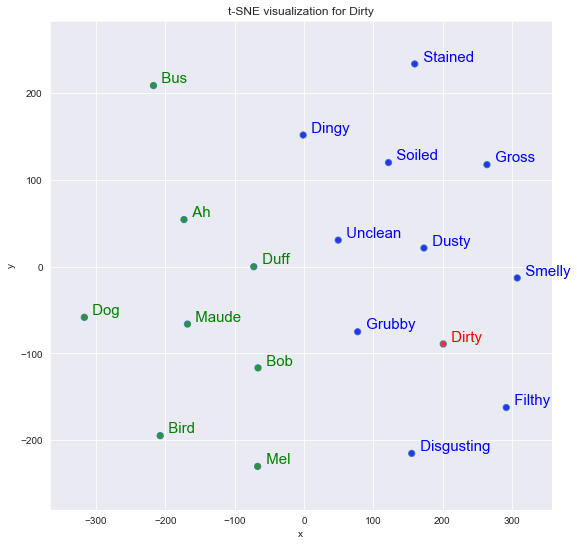

In [29]:
tsnescatterplot(model, 'dirty', ['dog', 'bird', 'ah', 'maude', 'bob', 'mel', 'bus', 'duff'])

### Against 10 most dissimilar words

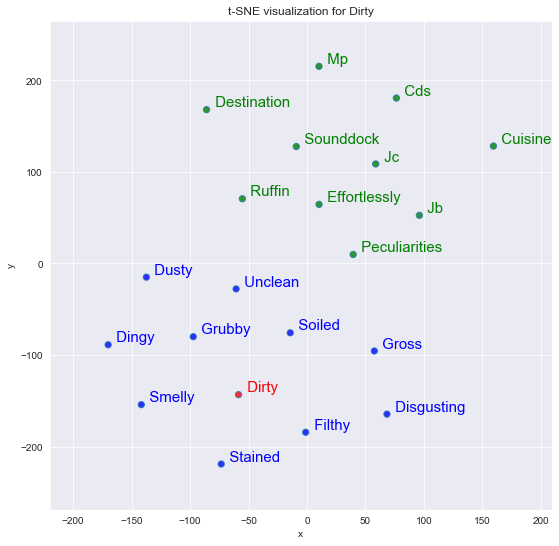

In [30]:
tsnescatterplot(model, 'dirty', [i[0] for i in model.wv.most_similar(negative=["dirty"])])